In [184]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

# NYTimes Bestselling List
### Available data: Title, Author, Publisher, Description, Weeks on Best Selling list

In [285]:
urls = {
    'combined print and ebook fiction':'https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-fiction/',
    'combined print and ebook non-fiction':'https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-nonfiction/',
    'hardcover fiction':'https://www.nytimes.com/books/best-sellers/hardcover-fiction/',
    'hardcover non-fiction':'https://www.nytimes.com/books/best-sellers/hardcover-nonfiction/',
    'paperback fiction':'https://www.nytimes.com/books/best-sellers/trade-fiction-paperback/',
    'paperback non-fiction':'https://www.nytimes.com/books/best-sellers/paperback-nonfiction/',
    'advice':'https://www.nytimes.com/books/best-sellers/advice-how-to-and-miscellaneous/',
    'childrens hardcover':'https://www.nytimes.com/books/best-sellers/childrens-middle-grade-hardcover/',
    'childrens picture':'https://www.nytimes.com/books/best-sellers/picture-books/',
    'childrens series':'https://www.nytimes.com/books/best-sellers/series-books/', 
    'young adult hardcover':'https://www.nytimes.com/books/best-sellers/young-adult-hardcover/'
}

Lists = ['combined print and ebook fiction', 'combined print and ebook non-fiction', 'hardcover fiction', 'hardcover non-fiction', 
        'paperback fiction', 'paperback non-fiction', 'advice', 'childrens hardcover', 'childrens picture', 'childrens series', 'young adult hardcover']
sites = [requests.get(url) for url in urls.values()]

titles=[]
descriptions=[]

list(sites[0])[0]
all_ny_df = pd.DataFrame(columns =['List', 'Title', 'Author', 'Publisher', 'Weeks_on_list', 'Description'])

count = 0
for html in sites:
    List = Lists[count]
    list_data = []
    rank = []
    count+=1
    
    
    
    soup = BeautifulSoup(html.text, 'html5lib')
    titles = [title.text for title in soup.findAll('h3')]

    publishers = soup('p', attrs={'class':'css-heg334'})
    publishers = [publisher.text for publisher in publishers]

    authors = soup('p', attrs={'class':'css-hjukut'})
    authors = [author.text for author in authors]
    authors = [author.replace("by ", "") for author in authors]

    weeks_on_list = soup('p', attrs={'class':'css-1o26r9v'})
    weeks_on_list = [week.text for week in weeks_on_list]
    wol = []
    for week in weeks_on_list:
        if week == 'New this week':
            wol.append(0)
        else: 
            wol.append(int(re.findall('[0-9]+', week)[0]))

    descriptions = soup('p', attrs={'class':'css-14lubdp'})
    descriptions = [description.text for description in descriptions]
    
    for i in range(len(authors)):
        list_data.append(List)
    for i in range(len(authors)):
        rank.append(i+1)
    
    list_df = pd.DataFrame(list(zip(list_data, rank, titles, authors, publishers, wol, descriptions)),
                   columns =['List', 'Rank', 'Title', 'Author', 'Publisher', 'Weeks_on_list', 'Description'])
    
    
    all_ny_df = pd.concat([all_ny_df, list_df])

    
all_ny_df

,List,Title,Author,Publisher,Weeks_on_list,Description,Rank
0,combined print and ebook fiction,Books|Best Sellers,Colleen Hoover,Atria,86,A battered wife raised in a violent home attem...,1.0
1,combined print and ebook fiction,IT ENDS WITH US,Colleen Hoover,Atria,16,"In the sequel to “It Ends With Us,” Lily deals...",2.0
2,combined print and ebook fiction,IT STARTS WITH US,Bonnie Garmus,Doubleday,13,A scientist and single mother living in Califo...,3.0
3,combined print and ebook fiction,LESSONS IN CHEMISTRY,Colleen Hoover,Grand Central,61,Lowen Ashleigh is hired by the husband of an i...,4.0
4,combined print and ebook fiction,VERITY,Colleen Hoover,Atria,0,After an unexpected death prevents her from go...,5.0
...,...,...,...,...,...,...,...
5,young adult hardcover,FIVE SURVIVE,Adam Silvera,Quill Tree,18,"In this prequel to ""They Both Die at the End,""...",6.0
6,young adult hardcover,THE FIRST TO DIE AT THE END,Karen M. McManus,Delacorte,262,"For five students, a detour into detention end...",7.0
7,young adult hardcover,ONE OF US IS LYING,Alex Aster,Amulet,24,Every 100 years the island of Lightlark appear...,8.0
8,young adult hardcover,LIGHTLARK,Kiera Cass,HarperTeen,8,Annika and Lennox are lovers on opposing sides...,9.0


In [277]:

# html = requests.get('https://www.nytimes.com/books/best-sellers/combined-print-and-e-book-fiction/', timeout=(5, 30))
# soup = BeautifulSoup(html.text, 'html5lib')

In [278]:
# titles=[]
# descriptions=[]
# for title in soup.findAll('h3'):
#     titles.append(title)

In [279]:
# titles = [title.text for title in titles]
# titles

In [280]:
# publishers = soup('p', attrs={'class':'css-heg334'})
# publishers = [publisher.text for publisher in publishers]
# publishers

In [281]:
# authors = soup('p', attrs={'class':'css-hjukut'})
# authors = [author.text for author in authors]
# authors = [author.replace("by ", "") for author in authors]
# authors 

In [282]:
# weeks_on_list = soup('p', attrs={'class':'css-1o26r9v'})
# weeks_on_list = [week.text for week in weeks_on_list]
# wol = []
# for week in weeks_on_list:
#     if week == 'New this week':
#         wol.append(0)
#     else: 
#         wol.append(int(re.findall('[0-9]+', week)[0]))
        
# print(wol)

In [283]:
# descriptions = soup('p', attrs={'class':'css-14lubdp'})
# descriptions = [description.text for description in descriptions]
# descriptions

In [284]:
# ny_df = pd.DataFrame(list(zip(titles, authors, publishers, wol, descriptions)),
#                columns =['Title', 'Author', 'Publisher', 'Weeks_on_list', 'Description'])

# ny_df

# Wikipedia Best Selling all time
### Data Available: Title, Author, Language, Date, Copies sold, Genre

In [104]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_best-selling_books', timeout=(5, 30))
soup = BeautifulSoup(html.text, 'html5lib')

In [105]:
for titles in soup.find_all('a', href=True):
    print(titles.get_attribute_list('title'))

[None]
[None]
['Search Wikipedia [f]']
['You are encouraged to create an account and log in; however, it is not mandatory']
[None]
['[o]']
[None]
['Discussion about edits from this IP address [n]']
['A list of edits made from this IP address [y]']
['Visit the main page [z]']
['Guides to browsing Wikipedia']
['Articles related to current events']
['Visit a randomly selected article [x]']
['Learn about Wikipedia and how it works']
['How to contact Wikipedia']
['Support us by donating to the Wikimedia Foundation']
['Guidance on how to use and edit Wikipedia']
['Learn how to edit Wikipedia']
['The hub for editors']
['A list of recent changes to Wikipedia [r]']
['Add images or other media for use on Wikipedia']
['List of all English Wikipedia pages containing links to this page [j]']
['Recent changes in pages linked from this page [k]']
['Upload files [u]']
['A list of all special pages [q]']
['Permanent link to this revision of this page']
['More information about this page']
['Information

In [143]:
titles = set()
authors = set()
genres = set()
trash = set()
languages = []
dates = []
sales = []
genres = []
info = []
counter = 0
for items in soup.find_all('table'):
    counter+=1
    for books in items.find_all('tr'):
        for columns in books.find_all('td'):

            info.append(columns.text)
    if counter == 3:
        break

In [172]:
titles = info[0::6]
titles = [title.rstrip() for title in titles]


authors = info[1::6]
authors = [author.rstrip() for author in authors]


languages = info[2::6]
languages = [language.rstrip() for language in languages]


dates = info[3::6]
dates = [int(re.findall('[0-9]+', date)[0]) for date in dates]

copies_sold = info[4::6]
copies_sold = [int(re.findall('[0-9]+', copies)[0]) for copies in copies_sold]

genres =info[5::6]
genres = [genre.lower().rstrip() for genre in genres]


In [176]:


df = pd.DataFrame(list(zip(titles, authors, languages, dates, copies_sold, genres)),
               columns =['Title', 'Author', 'Language', 'Publication Date', 'Copies Sold (millions)', 'Genre'])

df

,Title,Author,Language,Publication Date,Copies Sold (millions),Genre
0,Don Quixote,Miguel de Cervantes,Spanish,1605,500,adventure fiction
1,A Tale of Two Cities,Charles Dickens,English,1859,200,historical fiction
2,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200,novella
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120,fantasy
4,And Then There Were None,Agatha Christie,English,1939,100,mystery
...,...,...,...,...,...,...
102,The Secret,Rhonda Byrne,English,2006,20,self-help
103,Fear of Flying,Erica Jong,English,1973,20,romantic novel
104,Dune,Frank Herbert,English,1965,20,science fiction novel
105,Charlie and the Chocolate Factory,Roald Dahl,English,1964,20,children's fantasy novel


<AxesSubplot:xlabel='Publication Date', ylabel='Copies Sold (millions)'>

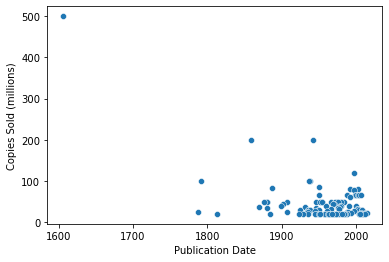

In [199]:
sns.scatterplot(data=df,x='Publication Date', y='Copies Sold (millions)')

In [201]:
df2 = df.drop(axis=0,index=0)

<AxesSubplot:xlabel='Publication Date', ylabel='Copies Sold (millions)'>

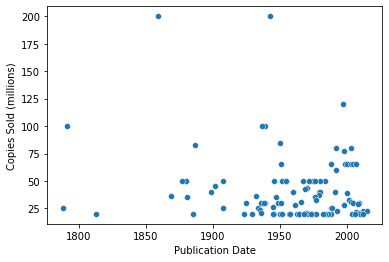

In [202]:
sns.scatterplot(data=df2,x='Publication Date', y='Copies Sold (millions)')

<AxesSubplot:xlabel='Copies Sold (millions)', ylabel='Count'>

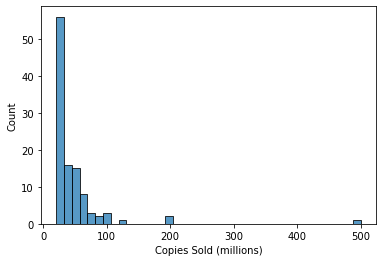

In [205]:
sns.histplot(data=df, x='Copies Sold (millions)')

In [182]:
df['Language'].value_counts()

English       82
Russian        6
Spanish        2
French         2
Chinese        2
Hindi          2
German         2
Italian        2
Norwegian      2
Portuguese     1
Dutch          1
Swedish        1
Japanese       1
Czech          1
Name: Language, dtype: int64

In [286]:
genres = df['Genre'].value_counts()
popular_genres = genres[0:10]
popular_genres

fantasy                                10
novel                                   8
self-help                               7
fiction                                 3
children's literature                   3
historical fiction                      3
science fiction novel                   2
children's novel                        2
children's fiction                      2
children's literature, picture book     2
Name: Genre, dtype: int64

In [287]:
# genre_df = popular_genres.groupby('Genre')
# genre_df

<AxesSubplot:xlabel='Publication Date', ylabel='Count'>

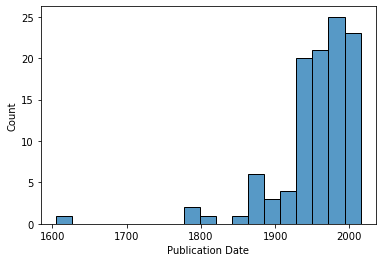

In [288]:
sns.histplot(data=df, x='Publication Date')

<AxesSubplot:xlabel='Genre', ylabel='Copies Sold (millions)'>

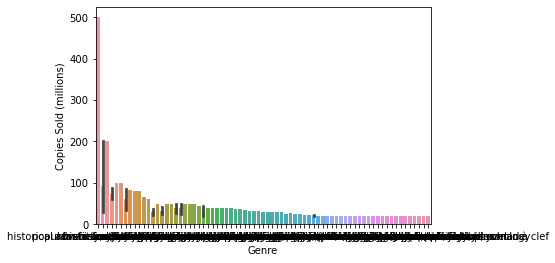

In [289]:
sns.barplot(data=df, x='Genre', y='Copies Sold (millions)')

In [ ]:
# soup.find_all('table') atts= {'class' : 'wikitable sortable jquery-tablesorter'}

[<table class="wikitable sortable">
 
 <tbody><tr>
 <th>Book</th>
 <th>Author(s)</th>
 <th>Original language</th>
 <th>First published</th>
 <th>Approximate sales
 </th>
 <th>Genre
 </th></tr>
 <tr>
 <td><i><a href="/wiki/Don_Quixote" title="Don Quixote">Don Quixote</a></i>
 </td>
 <td><a href="/wiki/Miguel_de_Cervantes" title="Miguel de Cervantes">Miguel de Cervantes</a>
 </td>
 <td>Spanish
 </td>
 <td>1605 (1st Part),
 <p>1615 (2nd Part)
 </p>
 </td>
 <td>500 million<sup class="reference" id="cite_ref-FoxBusiness2020_19-0"><a href="#cite_note-FoxBusiness2020-19">[19]</a></sup>
 </td>
 <td><a href="/wiki/Adventure_fiction" title="Adventure fiction">Adventure Fiction</a>
 </td></tr>
 <tr>
 <td><i><a href="/wiki/A_Tale_of_Two_Cities" title="A Tale of Two Cities">A Tale of Two Cities</a></i></td>
 <td><a href="/wiki/Charles_Dickens" title="Charles Dickens">Charles Dickens</a></td>
 <td>English</td>
 <td>1859</td>
 <td>200 million<sup class="reference" id="cite_ref-20"><a href="#cite_note